# 30类水果图像分类-单张图像预测

同济子豪兄 2023-6-25

## 导入工具包

In [1]:
import cv2
import PIL
from cvs import *

import numpy as np

import aidlite_gpu

import matplotlib.pyplot as plt
%matplotlib inline

## 载入中文字体

In [2]:
from PIL import ImageFont, ImageDraw
# 导入中文字体，指定字号
font = ImageFont.truetype('data_meta/SimHei.ttf', 32)

## 加载TFLite模型

In [3]:
model_path = 'ckpt/resnet18_fruit30.tflite'

NUM_CLASS = 30 # 指定类别个数

In [4]:
aidlite = aidlite_gpu.aidlite()

# 模型路径 输入维度 输出维度 线程数 是否开启NNAPI
# https://docs.aidlux.com/#/intro/ai/ai-aidlite?id=_4fast_annmodel
aidlite.FAST_ANNModel(model_path, [256*256*3*4], [NUM_CLASS*4], 4, 0)

[2023-06-25 16:22:54,669577][/tmp/ipykernel_21451/2808051052.py:1 <module>][DEBUG]:=======init


Result(id=1, result='load model ok!', error=None)

## 载入图像

In [5]:
img_path = 'test_img/watermelon2.jpeg'

In [6]:
# 用 pillow 载入图像
img_pil = PIL.Image.open(img_path)

In [7]:
img_bgr = np.array(img_pil)[:,:,::-1]

In [8]:
img_bgr.shape

(1024, 768, 3)

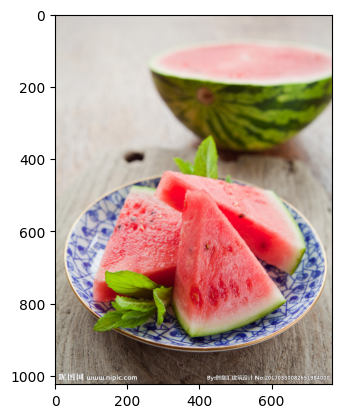

In [9]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

## 图像预处理

In [10]:
# 尺寸缩放
img_tensor = cv2.resize(img_bgr, (256, 256))

# 三通道的均值
mean = (0.485, 0.456, 0.406)

# 三通道的标准差
std = (0.229, 0.224, 0.225)

# 归一化
img_tensor = ((img_tensor / 255) - mean) / std
img_tensor = img_tensor.astype('float32')

## 推理预测

In [11]:
# 装填数据
aidlite.setInput_Float32(img_tensor)

Result(id=91, result=None, error=None)

In [12]:
# 推理预测
aidlite.invoke() 

Result(id=91, result=None, error=None)

In [13]:
# 获得推理预测结果
result = aidlite.getOutput_Float32()

## 解析预测结果

In [14]:
result.shape

(30,)

In [15]:
# # 每个类别的 logit 分数（非置信度）
# result

In [16]:
# 置信度最高类别 ID
pred_id = np.argmax(result)

In [17]:
pred_id

25

## 载入类别名称与ID映射表

In [18]:
# 中文类别名称
idx_to_labels = np.load('data_meta/fruit30_idx_to_labels.npy', allow_pickle=True).item()

In [19]:
idx_to_labels

{0: '哈密瓜',
 1: '圣女果',
 2: '山竹',
 3: '杨梅',
 4: '柚子',
 5: '柠檬',
 6: '桂圆',
 7: '梨',
 8: '椰子',
 9: '榴莲',
 10: '火龙果',
 11: '猕猴桃',
 12: '石榴',
 13: '砂糖橘',
 14: '胡萝卜',
 15: '脐橙',
 16: '芒果',
 17: '苦瓜',
 18: '苹果-红',
 19: '苹果-青',
 20: '草莓',
 21: '荔枝',
 22: '菠萝',
 23: '葡萄-白',
 24: '葡萄-红',
 25: '西瓜',
 26: '西红柿',
 27: '车厘子',
 28: '香蕉',
 29: '黄瓜'}

In [20]:
pred_class = idx_to_labels[pred_id]

In [21]:
pred_class

'西瓜'

## 将预测类别名称写在图片上

In [22]:
draw = ImageDraw.Draw(img_pil)

In [23]:
# 文字坐标，中文字符串，字体，rgba颜色
draw.text((200, 220), pred_class, font=font, fill=(255, 0, 0, 1))

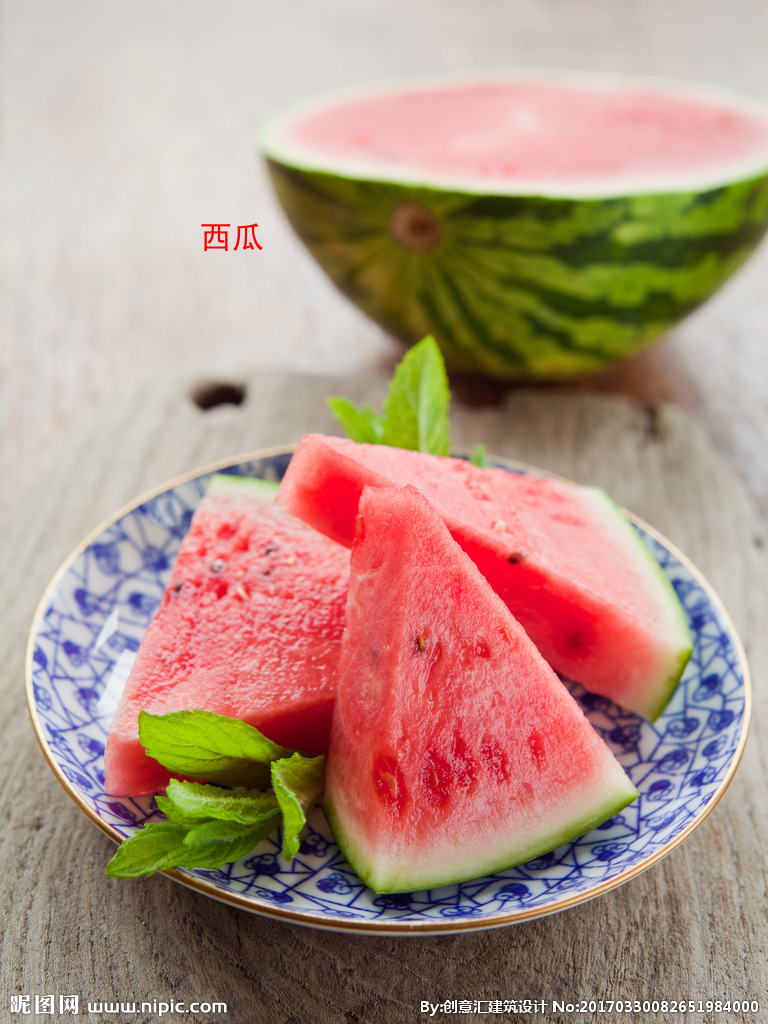

In [24]:
img_pil

In [25]:
# 保存图像
# img_pil.save('output/img_pred.jpg')

## 将预测结果显示在手机屏幕上

In [26]:
img_output = np.array(img_pil)[:,:,::-1]

In [27]:
cvs.imshow(img_output)

remi.server      INFO     Started httpserver http://0.0.0.0:30823/


('app runs on port:', 30823)
